In [26]:
import numpy
import pandas 
import matplotlib.pyplot as plt

# 1. Load the data and clean

In [27]:
df = pandas.read_csv('new.csv')
df.rename(columns={df.columns[0]: 'index'}, inplace=True)
df.set_index(df.columns[0], inplace=True)
df.head()

,image_path,actual,predicted
index,,,
0,00206969-018_Kalodimos_TIF.jpg,"{'description': (0x010E) ASCII=00206969-018, 0...",USER: \n Generate a comma separated list of h...
1,00214636-006_TIF.jpg,"{'description': (0x010E) ASCII=00214636-006, 0...",USER: \n Generate a comma separated list of h...
2,00204697-010_TIF.jpg,"{'description': (0x010E) ASCII=00204697-010, 0...",USER: \n Generate a comma separated list of h...
3,00206966-004_Abraham_TIF.jpg,"{'description': (0x010E) ASCII=00206966-004, 0...",USER: \n Generate a comma separated list of h...
4,00213077-009_TIF.jpg,"{'description': (0x010E) ASCII=00213077-009, 1...",USER: \n Generate a comma separated list of h...


In [28]:
actual = pandas.read_csv('actual.csv')
actual.rename(columns={actual.columns[0]: 'index'}, inplace=True)

# Set df[actual] to the actual values
df['actual'] = actual['actual']
df.head()

,image_path,actual,predicted
index,,,
0,00206969-018_Kalodimos_TIF.jpg,"{'description': '00206969-018, 05-23-19, staff...",USER: \n Generate a comma separated list of h...
1,00214636-006_TIF.jpg,"{'description': '00214636-006, 07-01-21, campu...",USER: \n Generate a comma separated list of h...
2,00204697-010_TIF.jpg,"{'description': '00204697-010, 01-31-19, resea...",USER: \n Generate a comma separated list of h...
3,00206966-004_Abraham_TIF.jpg,"{'description': '00206966-004, 05-23-19, staff...",USER: \n Generate a comma separated list of h...
4,00213077-009_TIF.jpg,"{'description': '00213077-009, 11-09-20, campu...",USER: \n Generate a comma separated list of h...


In [29]:
control = pandas.read_csv('control.csv')
control.rename(columns={control.columns[0]: 'index'}, inplace=True)
control.set_index(control.columns[0], inplace=True)

# Set df[control] to the control values
df['control'] = control['predicted']
df.head()

,image_path,actual,predicted,control
index,,,,
0,00206969-018_Kalodimos_TIF.jpg,"{'description': '00206969-018, 05-23-19, staff...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...
1,00214636-006_TIF.jpg,"{'description': '00214636-006, 07-01-21, campu...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...
2,00204697-010_TIF.jpg,"{'description': '00204697-010, 01-31-19, resea...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...
3,00206966-004_Abraham_TIF.jpg,"{'description': '00206966-004, 05-23-19, staff...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...
4,00213077-009_TIF.jpg,"{'description': '00213077-009, 11-09-20, campu...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...


In [30]:
import ast
import re

# Cleaning
def extract_semantic_tags(actual_str):
    # Convert string representation of dictionary to a dictionary
    actual_dict = ast.literal_eval(actual_str)
    # Get the description and split into tags
    tags = actual_dict['description'].strip(" '{}'").split(', ')
    semantic_tags = [
        tag for tag in tags 
        if not re.match(r'^\d{8}-\d{3}', tag) and  # Pattern for filename like YYYYMMDD-XXX
        not re.match(r'^\d{2}-\d{2}-\d{2}', tag) and  # Pattern for date like MM-DD-YY
        not re.match(r'^\d{8}$', tag) and  # Pattern for YYYYMMDD only
        not re.match(r'^[0-9]+$', tag) and  # Exclude purely numeric tags
        not re.match(r'^\d{2}-\d{2}-\d{4}$', tag)  # Pattern for date like MM-DD-YYYY
    ]
    return ", ".join(semantic_tags)

# Apply the cleaning function to the 'actual' column
df['cleaned_actual'] = df['actual'].apply(extract_semantic_tags)

In [31]:
df.head()

,image_path,actual,predicted,control,cleaned_actual
index,,,,,
0,00206969-018_Kalodimos_TIF.jpg,"{'description': '00206969-018, 05-23-19, staff...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"staff location portraits, individuals, researc..."
1,00214636-006_TIF.jpg,"{'description': '00214636-006, 07-01-21, campu...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"campus aerial, campus exterior, Hope garden, d..."
2,00204697-010_TIF.jpg,"{'description': '00204697-010, 01-31-19, resea...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"research instruments, laboratory, reagent bott..."
3,00206966-004_Abraham_TIF.jpg,"{'description': '00206966-004, 05-23-19, staff...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"staff - location portraits, office, Computatio..."
4,00213077-009_TIF.jpg,"{'description': '00213077-009, 11-09-20, campu...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"campus exteriors, campus details, fall, season..."


In [32]:
# Cleaning Predicted
# Predicted is of the form USER:\n Generate a comma separated list of high-quality metadata keywords (ONLY KEYWORDS). ASSISTANT: 

def extract_predicted_tags(predicted_str):
    # Split the string by the ASSISTANT: tag
    predicted = set(tag.strip() for tag in predicted_str.split('ASSISTANT: ')[1].split(','))
    return ", ".join(predicted)

def extract_control_description(control_str):
    control = control_str.split('ASSISTANT: ')[1]
    return control

# Apply the cleaning function to the 'predicted' column
df['cleaned_predicted'] = df['predicted'].apply(extract_predicted_tags)
df['cleaned_control'] = df['control'].apply(extract_control_description)
df.head()

,image_path,actual,predicted,control,cleaned_actual,cleaned_predicted,cleaned_control
index,,,,,,,
0,00206969-018_Kalodimos_TIF.jpg,"{'description': '00206969-018, 05-23-19, staff...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"staff location portraits, individuals, researc...","blue light, Ascend, blue screen, suit, magazin...","The image features a large, modern hospital wi..."
1,00214636-006_TIF.jpg,"{'description': '00214636-006, 07-01-21, campu...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"campus aerial, campus exterior, Hope garden, d...","Hope, flowers, path, mosaic, love, heart, mura...",The image features a row of fourteen identical...
2,00204697-010_TIF.jpg,"{'description': '00204697-010, 01-31-19, resea...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"research instruments, laboratory, reagent bott...",", vial, glassware, vials, glass, glassware con...",The image features a blue light illuminating a...
3,00206966-004_Abraham_TIF.jpg,"{'description': '00206966-004, 05-23-19, staff...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"staff - location portraits, office, Computatio...",", colorful display, laptop, colorful monitor, ...",The image shows a group of three men standing ...
4,00213077-009_TIF.jpg,"{'description': '00213077-009, 11-09-20, campu...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"campus exteriors, campus details, fall, season...","St. Charles, St. Charles Hospital, St",The image features a large collection of glass...


# Evaluation

In [33]:
%pip install -U sentence-transformers

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [34]:
# SBERT
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode the sentences
predicted = df['cleaned_predicted'].tolist()
actual = df['cleaned_actual'].tolist()
control = df['cleaned_control'].tolist()

similarity_scores = []
for i in range(len(actual)):
    sentences = [actual[i], predicted[i]]
    embeddings = model.encode(sentences)
    similarities = model.similarity(embeddings, embeddings)
    score = similarities[0][1] 
    similarity_scores.append(score.item())

df['sbert'] = similarity_scores

# Reset for control
similarity_scores = []
for i in range(len(actual)):
    sentences = [actual[i], control[i]]
    embeddings = model.encode(sentences)
    similarities = model.similarity(embeddings, embeddings)
    score = similarities[0][1] 
    similarity_scores.append(score.item())

df['control_sbert'] = similarity_scores

In [35]:
%pip install --upgrade tensorflow_hub

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [36]:
# USE
import tensorflow_hub as hub

# Load the Universal Sentence Encoder model
use_model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
use_embeddings = use_model(df['cleaned_actual'].tolist() + df['cleaned_predicted'].tolist())
use_similarity_scores = []
for i in range(len(actual)):
    score = numpy.inner(use_embeddings[i], use_embeddings[i + len(actual)])
    use_similarity_scores.append(score)
df['use'] = use_similarity_scores

# Reset for control
use_embeddings = use_model(df['cleaned_actual'].tolist() + df['cleaned_control'].tolist())
use_similarity_scores = []
for i in range(len(actual)):
    score = numpy.inner(use_embeddings[i], use_embeddings[i + len(actual)])
    use_similarity_scores.append(score)
df['control_use'] = use_similarity_scores

df.head()

,image_path,actual,predicted,control,cleaned_actual,cleaned_predicted,cleaned_control,sbert,control_sbert,use,control_use
index,,,,,,,,,,,
0,00206969-018_Kalodimos_TIF.jpg,"{'description': '00206969-018, 05-23-19, staff...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"staff location portraits, individuals, researc...","blue light, Ascend, blue screen, suit, magazin...","The image features a large, modern hospital wi...",0.318750,0.158472,0.021403,0.056639
1,00214636-006_TIF.jpg,"{'description': '00214636-006, 07-01-21, campu...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"campus aerial, campus exterior, Hope garden, d...","Hope, flowers, path, mosaic, love, heart, mura...",The image features a row of fourteen identical...,0.365908,0.124830,0.287483,-0.064631
2,00204697-010_TIF.jpg,"{'description': '00204697-010, 01-31-19, resea...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"research instruments, laboratory, reagent bott...",", vial, glassware, vials, glass, glassware con...",The image features a blue light illuminating a...,0.618177,0.334756,0.654296,0.165188
3,00206966-004_Abraham_TIF.jpg,"{'description': '00206966-004, 05-23-19, staff...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"staff - location portraits, office, Computatio...",", colorful display, laptop, colorful monitor, ...",The image shows a group of three men standing ...,0.327029,0.326477,0.044118,0.162075
4,00213077-009_TIF.jpg,"{'description': '00213077-009, 11-09-20, campu...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"campus exteriors, campus details, fall, season...","St. Charles, St. Charles Hospital, St",The image features a large collection of glass...,0.121085,0.175702,0.052707,0.013295


In [37]:
import torch
from transformers import CLIPProcessor, CLIPModel

# Initialize CLIP model
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Define actual and predicted descriptions
actual_descriptions = df['cleaned_actual'].tolist()
predicted_descriptions = df['cleaned_predicted'].tolist()

# Compute CLIP similarity scores
clip_similarity_scores = []
for actual_desc, predicted_desc in zip(actual_descriptions, predicted_descriptions):
    inputs = processor(text=[actual_desc, predicted_desc], return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model.get_text_features(**inputs)
    score = torch.cosine_similarity(outputs[0], outputs[1], dim=0).item()
    clip_similarity_scores.append(score)
df['clip'] = clip_similarity_scores

# Reset for control
control_descriptions = df['cleaned_control'].tolist()
clip_similarity_scores = []
for actual_desc, control_desc in zip(actual_descriptions, control_descriptions):
    inputs = processor(text=[actual_desc, control_desc], return_tensors="pt", padding=True, truncation=True)
    with torch.no_grad():
        outputs = model.get_text_features(**inputs)
    score = torch.cosine_similarity(outputs[0], outputs[1], dim=0).item()
    clip_similarity_scores.append(score)
df['control_clip'] = clip_similarity_scores
df.head()


,image_path,actual,predicted,control,cleaned_actual,cleaned_predicted,cleaned_control,sbert,control_sbert,use,control_use,clip,control_clip
index,,,,,,,,,,,,,
0,00206969-018_Kalodimos_TIF.jpg,"{'description': '00206969-018, 05-23-19, staff...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"staff location portraits, individuals, researc...","blue light, Ascend, blue screen, suit, magazin...","The image features a large, modern hospital wi...",0.318750,0.158472,0.021403,0.056639,0.281615,0.561468
1,00214636-006_TIF.jpg,"{'description': '00214636-006, 07-01-21, campu...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"campus aerial, campus exterior, Hope garden, d...","Hope, flowers, path, mosaic, love, heart, mura...",The image features a row of fourteen identical...,0.365908,0.124830,0.287483,-0.064631,0.411045,0.575566
2,00204697-010_TIF.jpg,"{'description': '00204697-010, 01-31-19, resea...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"research instruments, laboratory, reagent bott...",", vial, glassware, vials, glass, glassware con...",The image features a blue light illuminating a...,0.618177,0.334756,0.654296,0.165188,0.857349,0.584994
3,00206966-004_Abraham_TIF.jpg,"{'description': '00206966-004, 05-23-19, staff...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"staff - location portraits, office, Computatio...",", colorful display, laptop, colorful monitor, ...",The image shows a group of three men standing ...,0.327029,0.326477,0.044118,0.162075,0.642338,0.531172
4,00213077-009_TIF.jpg,"{'description': '00213077-009, 11-09-20, campu...",USER: \n Generate a comma separated list of h...,USER: \n Generate a description. \nASSISTANT:...,"campus exteriors, campus details, fall, season...","St. Charles, St. Charles Hospital, St",The image features a large collection of glass...,0.121085,0.175702,0.052707,0.013295,0.626354,0.623685


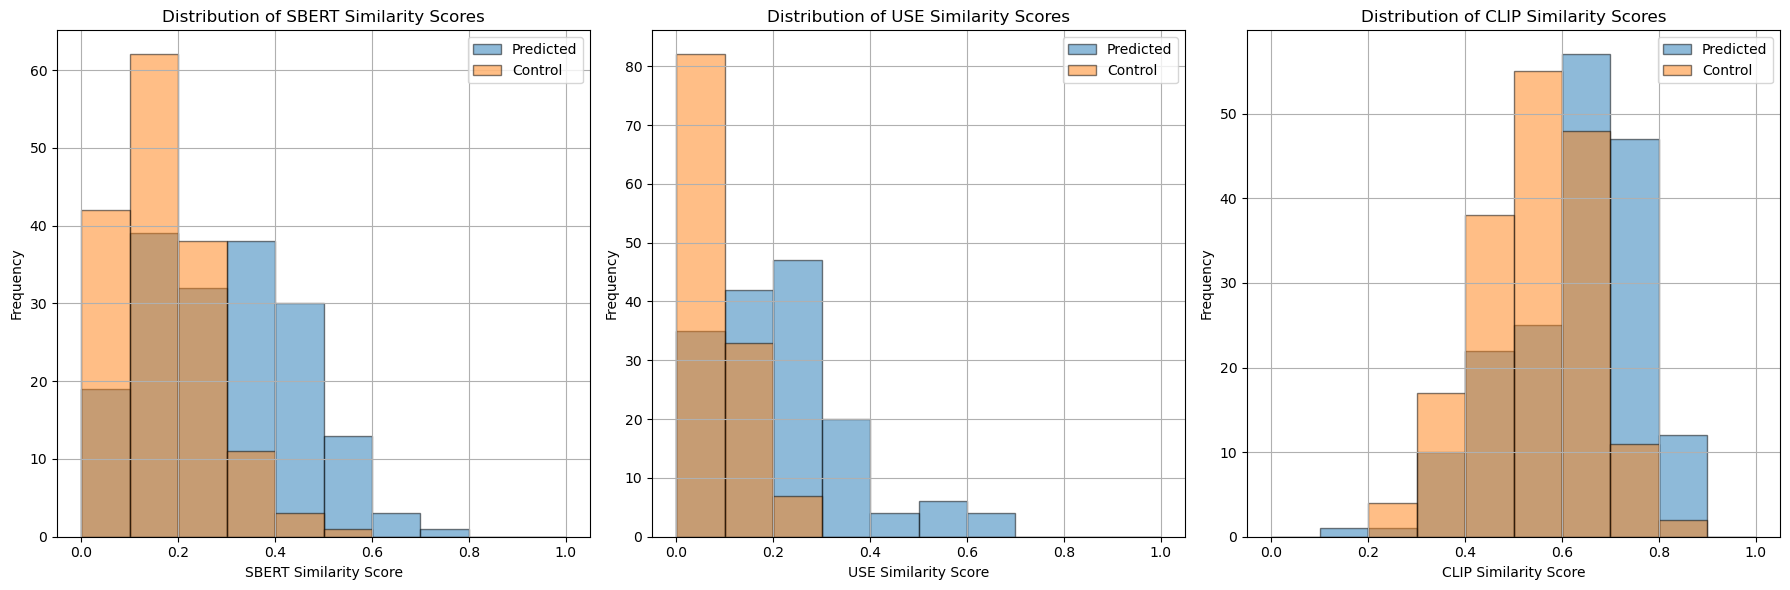

In [45]:
plt.figure(figsize=(18, 6))
# 1st subplot
plt.subplot(1, 3, 1)
plt.hist(df['sbert'], bins=numpy.arange(0, 1.1, 0.1), edgecolor='black', alpha=0.5)
plt.hist(df['control_sbert'], bins=numpy.arange(0, 1.1, 0.1), edgecolor='black', alpha=0.5)
plt.xlabel('SBERT Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of SBERT Similarity Scores')
plt.grid()
plt.legend(['Predicted', 'Control'])
# 2nd subplot
plt.subplot(1, 3, 2)
plt.hist(df['use'], bins=numpy.arange(0, 1.1, 0.1), edgecolor='black', alpha=0.5)
plt.hist(df['control_use'], bins=numpy.arange(0, 1.1, 0.1), edgecolor='black', alpha=0.5)
plt.xlabel('USE Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of USE Similarity Scores')
plt.grid()
plt.legend(['Predicted', 'Control'])
# 3rd subplot
plt.subplot(1, 3, 3)
plt.hist(df['clip'], bins=numpy.arange(0, 1.1, 0.1), edgecolor='black', alpha=0.5)
plt.hist(df['control_clip'], bins=numpy.arange(0, 1.1, 0.1), edgecolor='black', alpha=0.5)
plt.xlabel('CLIP Similarity Score')
plt.ylabel('Frequency')
plt.title('Distribution of CLIP Similarity Scores')
plt.grid()
plt.legend(['Predicted', 'Control'])

plt.tight_layout()

In [39]:
# Save the DataFrame to a new CSV file
df.to_csv('output.csv', index=False)